<a href="https://colab.research.google.com/github/ali-talebi/Presentation_For_Proposal/blob/main/Ali_Talebi_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as td
from tensorflow import keras
from keras.models import Sequential , Model
from keras.layers import  Dense
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Conv2D , Dense , Dropout , BatchNormalization  , MaxPooling2D , Flatten , Input


In [ ]:
data  = mnist
(x_train , y_train ) , (x_test , y_test ) = data.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train = x_train.astype("float" ) / 255.0
x_test  = x_test.astype("float") / 255.0

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

0


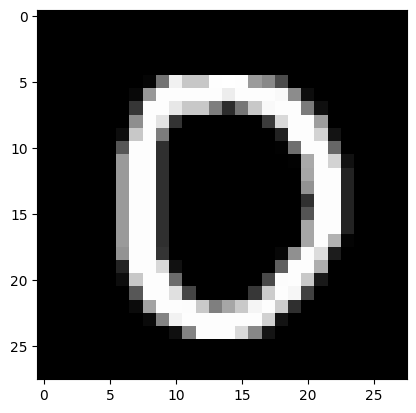

In [ ]:
plt.imshow(x_train[1532] , cmap="gray")
print(y_train[1532])
plt.show()

In [ ]:
new_y_train = to_categorical(y_train , 10 )
new_y_test  = to_categorical(y_test , 10  )

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
new_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_train = x_train.reshape(-1 , 28 , 28 , 1 )
x_test  = x_test.reshape(-1 , 28 , 28 , 1 )

In [ ]:
models = Sequential([
    Conv2D(128 , (3) , activation='relu' , input_shape = x_train.shape[1:])  ,
    BatchNormalization() ,
    Conv2D(64 , (3) , activation='relu' ) ,
    MaxPooling2D() ,
    Conv2D(32 , (3) , activation = 'relu') ,
    BatchNormalization() ,

    Flatten() ,
    Dense(128 , activation = "relu" )  ,
    Dropout(0.2) ,
    Dense(32 , activation="relu" ) ,
    Dropout(0.2) ,
    Dense(10 , activation='softmax' )

])

In [ ]:
models.compile('adam' , loss = ['categorical_crossentropy'] , metrics=['acc'])

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
y_train.shape

(60000,)

In [ ]:
ali = models.fit(x_train , new_y_train , epochs=10 , batch_size=200 , validation_split=0.2  )

Epoch 1/10
240/240 [==============================] - 13s 25ms/step - loss: 0.2533 - acc: 0.9232 - val_loss: 3.7134 - val_acc: 0.1825
Epoch 2/10
240/240 [==============================] - 5s 22ms/step - loss: 0.0790 - acc: 0.9789 - val_loss: 0.3213 - val_acc: 0.9042
Epoch 3/10
240/240 [==============================] - 6s 23ms/step - loss: 0.0583 - acc: 0.9842 - val_loss: 0.0555 - val_acc: 0.9839
Epoch 4/10
240/240 [==============================] - 6s 23ms/step - loss: 0.0429 - acc: 0.9881 - val_loss: 0.0504 - val_acc: 0.9869
Epoch 5/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0332 - acc: 0.9901 - val_loss: 0.0531 - val_acc: 0.9858
Epoch 6/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0274 - acc: 0.9917 - val_loss: 0.0476 - val_acc: 0.9892
Epoch 7/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0218 - acc: 0.9937 - val_loss: 0.0433 - val_acc: 0.9906
Epoch 8/10
240/240 [==============================] - 5s 23ms/step -

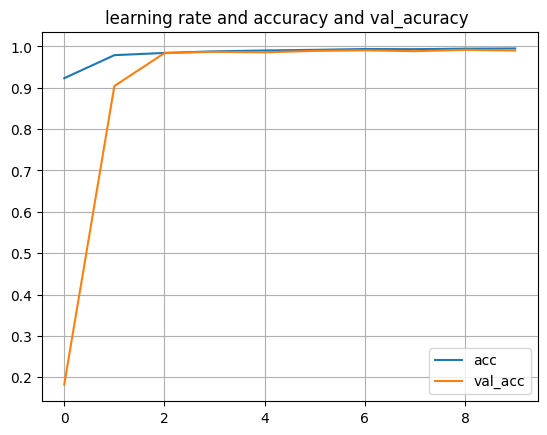

In [ ]:
plt.plot(range(10) , ali.history['acc'] , label = "acc"  )
plt.plot(range(10) , ali.history['val_acc'] , label = "val_acc"  )
plt.title("learning rate and accuracy and val_acuracy ")
plt.legend()
plt.grid()
plt.show()

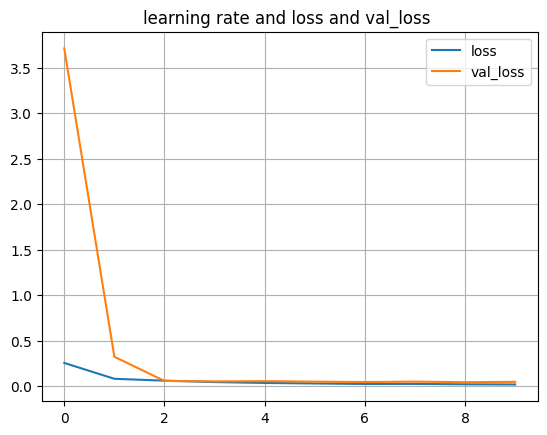

In [ ]:
plt.plot(range(10) , ali.history['loss'] , label = "loss"  )
plt.plot(range(10) , ali.history['val_loss'] , label = "val_loss"  )
plt.title("learning rate and loss and val_loss ")
plt.legend()
plt.grid()
plt.show()

In [ ]:
models.evaluate(x_test , new_y_test )

313/313 [==============================] - 2s 4ms/step - loss: 0.0437 - acc: 0.9900


[0.04372869431972504, 0.9900000095367432]

In [ ]:
models.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
t = []
t.append(x_train[36251])
t = np.array(t)
t.shape

(1, 28, 28, 1)

In [ ]:
result = models.predict(t)

1/1 [==============================] - 0s 280ms/step


In [ ]:
result = np.argmax(result)

In [ ]:
result

0

original value  0 predicted :  0


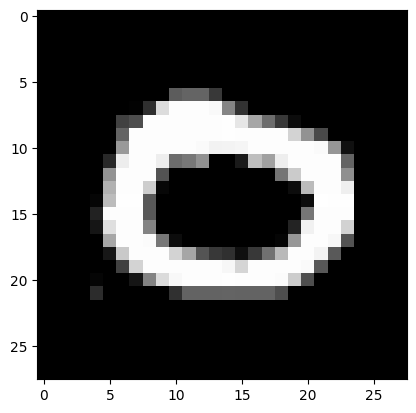

In [ ]:
plt.imshow(x_train[36251] , cmap="gray")
print("original value " , y_train[36251] , "predicted : " , result )
plt.show()

In [ ]:
x_inputs = Input(shape = x_train.shape[1:])
conv1    = Conv2D(128 ,(3,3) , activation = 'relu' )(x_inputs)
batch1   = BatchNormalization()(conv1)
conv2    = Conv2D(100 , (3,3) , activation="relu" )(batch1)
batch2   = BatchNormalization()(conv2)
max1     = MaxPooling2D()(batch2)


conv3    = Conv2D(50 , (3,3) , activation="relu" )(max1)
batch3   = BatchNormalization()(conv3)
max2     = MaxPooling2D()(batch3)
falt1    = Flatten()(max2)

dens1    = Dense(128 , activation="relu" )(falt1)
dropout1 = Dropout(0.2)(dens1)
dens2    = Dense(50 , activation="relu" )(dropout1)
dropout2 = Dropout(0.2)(dens2)
dens3    = Dense(20 , activation="relu" )(dropout2)
dens4    = Dense(10 , activation="softmax" )(dens3)
model2 = Model(inputs = x_inputs , outputs = dens4 )










In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_7 (Bat  (None, 26, 26, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 100)       115300    
                                                                 
 batch_normalization_8 (Bat  (None, 24, 24, 100)       400       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 100)       0     

In [ ]:
model2.compile(loss = 'categorical_crossentropy' , metrics = ['acc'] , optimizer= 'adam' )

In [ ]:
ali2 = model2.fit(x_train , new_y_train , epochs=10 , batch_size=50 , validation_split= 0.2  )

Epoch 1/10
960/960 [==============================] - 15s 11ms/step - loss: 0.2676 - acc: 0.9187 - val_loss: 0.0658 - val_acc: 0.9837
Epoch 2/10
960/960 [==============================] - 11s 11ms/step - loss: 0.0762 - acc: 0.9799 - val_loss: 0.0499 - val_acc: 0.9866
Epoch 3/10
960/960 [==============================] - 10s 11ms/step - loss: 0.0560 - acc: 0.9849 - val_loss: 0.0443 - val_acc: 0.9879
Epoch 4/10
960/960 [==============================] - 11s 11ms/step - loss: 0.0446 - acc: 0.9877 - val_loss: 0.0369 - val_acc: 0.9904
Epoch 5/10
960/960 [==============================] - 10s 10ms/step - loss: 0.0365 - acc: 0.9904 - val_loss: 0.0484 - val_acc: 0.9887
Epoch 6/10
960/960 [==============================] - 10s 10ms/step - loss: 0.0339 - acc: 0.9908 - val_loss: 0.0516 - val_acc: 0.9873
Epoch 7/10
960/960 [==============================] - 10s 11ms/step - loss: 0.0289 - acc: 0.9924 - val_loss: 0.0382 - val_acc: 0.9906
Epoch 8/10
960/960 [==============================] - 10s 11ms

In [ ]:
model2.evaluate(x_test , new_y_test )

313/313 [==============================] - 2s 5ms/step - loss: 0.0259 - acc: 0.9933


[0.02594161406159401, 0.9933000206947327]

In [ ]:
model2.save('model2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_7 (Bat  (None, 26, 26, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 100)       115300    
                                                                 
 batch_normalization_8 (Bat  (None, 24, 24, 100)       400       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 100)       0     

In [ ]:
for i , j  in enumerate(model2.layers ) :
  print(i , j )

0 <keras.src.engine.input_layer.InputLayer object at 0x77fd880595d0>
1 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x77fd88059db0>
2 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x77fd8805a710>
3 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x77fd87e0de40>
4 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x77fd87e0c3d0>
5 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x77fe01b16e90>
6 <keras.src.layers.convolutional.conv2d.Conv2D object at 0x77fd87e0cb80>
7 <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x77fd8805a170>
8 <keras.src.layers.pooling.max_pooling2d.MaxPooling2D object at 0x77fd87df6ef0>
9 <keras.src.layers.reshaping.flatten.Flatten object at 0x77fd87e0f010>
10 <keras.src.layers.core.dense.Dense object at 0x77fd87f20df0>
11 <keras.src.layers.regularization.dropout.Dropout object at 0x77fd87f234c0>
12 <keras.src.layers.core.dense.Dens

In [ ]:
t.shape

(1, 28, 28, 1)

In [ ]:
model2.predict(t)

1/1 [==============================] - 0s 59ms/step


IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

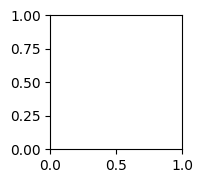

In [ ]:
conv_layer = model2.get_layer('conv2d_9')

# Pass the image through the model and get the convolutional layer output
feature_maps = model2.predict(t)

# Visualize the feature maps
num_filters = feature_maps.shape[-1]
plt.figure(figsize=(16, 8))
for i in range(num_filters):
    plt.subplot(4, 8, i + 1)
    plt.imshow(feature_maps[:, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Convolutional Layer Feature Maps')
plt.show()

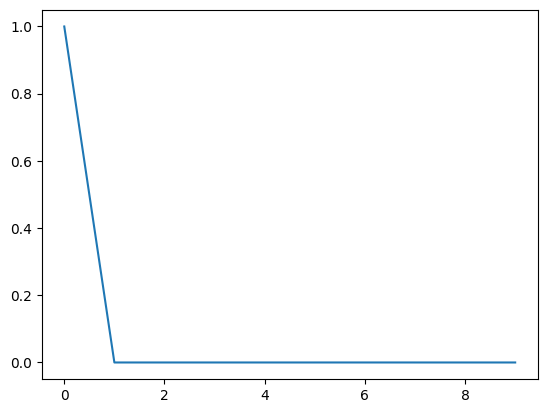

In [ ]:
plt.plot(feature_maps[0])
plt.show()

In [ ]:
from tensorflow.keras.saving import load_model

In [ ]:
model3 = load_model('/content/model2.h5')

In [ ]:
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 26, 26, 128)       1280      
                                                                 
 batch_normalization_7 (Bat  (None, 26, 26, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 100)       115300    
                                                                 
 batch_normalization_8 (Bat  (None, 24, 24, 100)       400       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 12, 12, 100)       0     

In [ ]:
model3.weights

[<tf.Variable 'conv2d_8/kernel:0' shape=(3, 3, 1, 128) dtype=float32, numpy=
 array([[[[-0.08371618, -0.1278502 ,  0.1822222 , ..., -0.03236255,
           -0.08374351, -0.19290118]],
 
         [[-0.10562257, -0.01928998,  0.13892354, ...,  0.06374344,
           -0.14151327, -0.06746937]],
 
         [[-0.01793234, -0.16364478, -0.11148708, ..., -0.05165941,
            0.01618325,  0.08770175]]],
 
 
        [[[ 0.0099999 ,  0.00711812,  0.07185686, ..., -0.07155597,
           -0.01291988, -0.01097362]],
 
         [[ 0.02152785,  0.03971166,  0.06181263, ..., -0.03798105,
            0.13890913,  0.13927236]],
 
         [[-0.09800124, -0.2352101 , -0.16096006, ..., -0.12038146,
            0.15685722,  0.00614455]]],
 
 
        [[[-0.07779251,  0.2110768 , -0.16926506, ...,  0.01067553,
           -0.03972401,  0.1593787 ]],
 
         [[-0.02662209,  0.00837359, -0.16632016, ..., -0.12219803,
            0.0357429 ,  0.07315489]],
 
         [[-0.04378841, -0.08839139, -0.13478

In [ ]:
x_train[0].shape

(28, 28, 1)

1/1 [==============================] - 0s 76ms/step


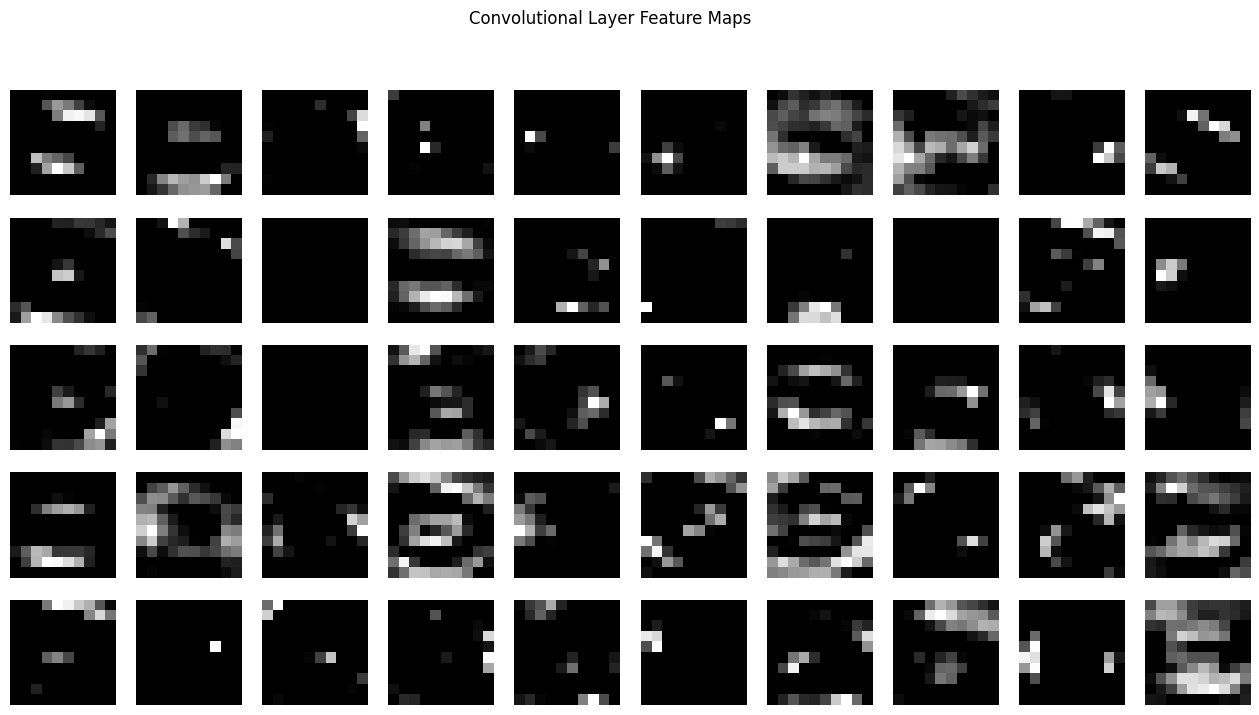

In [ ]:
from keras.models import load_model, Model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained Keras model
model = load_model('/content/model2.h5')

# Load and preprocess the input image


# Access a specific layer in the model
target_layer = model.get_layer('conv2d_10')

# Get the output of the target layer
layer_output = Model(inputs=model.input, outputs=target_layer.output)
layer_features = layer_output.predict(t)

# Visualize the layer output
num_filters = layer_features.shape[-1]
plt.figure(figsize=(16, 8))
for i in range(num_filters):
    plt.subplot(5, 10 , i + 1)
    plt.imshow(layer_features[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Convolutional Layer Feature Maps')
plt.show()

In [ ]:
layer_features.shape

(1, 10, 10, 50)

In [ ]:
num_filters

50

In [ ]:
plt.imshow(layer_features[0])

1/1 [==============================] - 0s 197ms/step


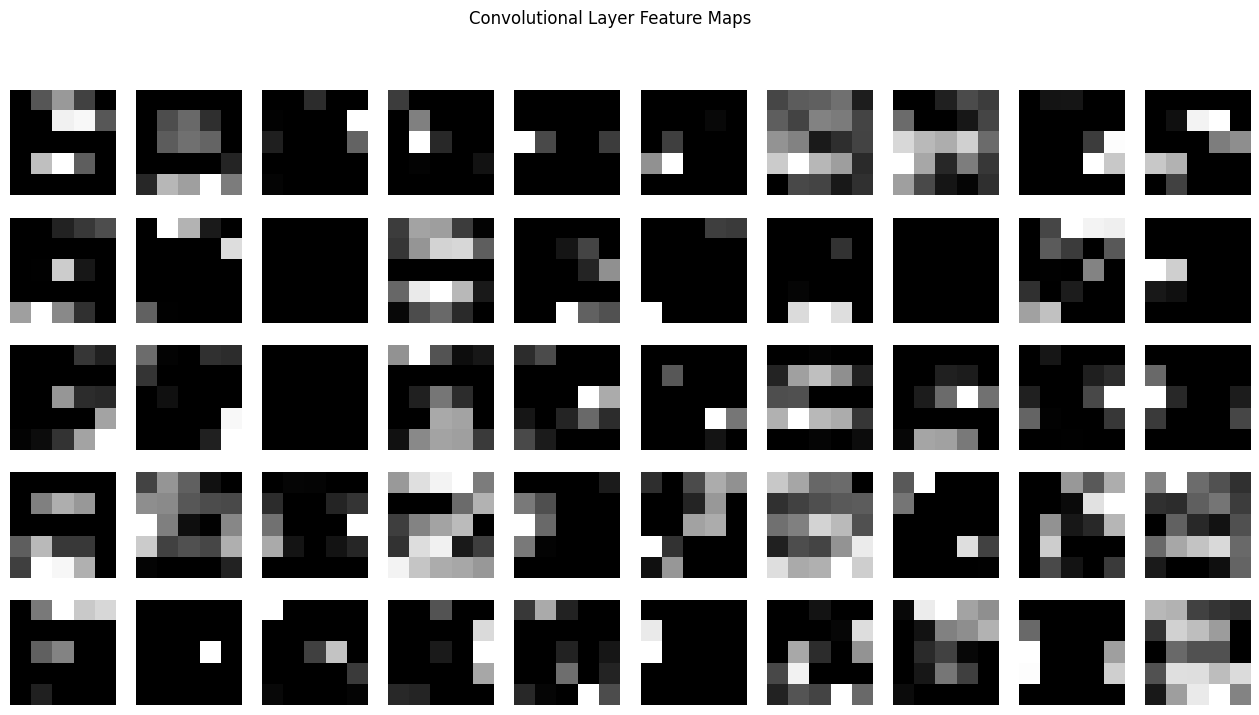

In [ ]:
from keras.models import load_model, Model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained Keras model
model = load_model('/content/model2.h5')

# Load and preprocess the input image


# Access a specific layer in the model
target_layer = model.get_layer('max_pooling2d_5')

# Get the output of the target layer
layer_output = Model(inputs=model.input, outputs=target_layer.output)
layer_features = layer_output.predict(t)

# Visualize the layer output
num_filters = layer_features.shape[-1]
plt.figure(figsize=(16, 8))
for i in range(num_filters):
    plt.subplot(5, 10 , i + 1)
    plt.imshow(layer_features[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle('Convolutional Layer Feature Maps')
plt.show()

In [ ]:
layer_features.shape

(1, 5, 5, 50)

In [77]:
from keras.models import load_model, Model
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Load the trained Keras model
model = load_model('/content/model2.h5')

# Load and preprocess the input image


# Access a specific layer in the model
target_layer = model.get_layer('flatten_2')

# Get the output of the target layer
layer_output = Model(inputs=model.input, outputs=target_layer.output)
layer_features = layer_output.predict(t)

# Visualize the layer output


1/1 [==============================] - 0s 88ms/step


In [80]:
target_layer

In [79]:
for i in target_layer :
  print(i)
  break

TypeError: 'Flatten' object is not iterable

In [75]:
target_layer.shape

AttributeError: 'Flatten' object has no attribute 'shape'

TypeError: float() argument must be a string or a real number, not 'Flatten'

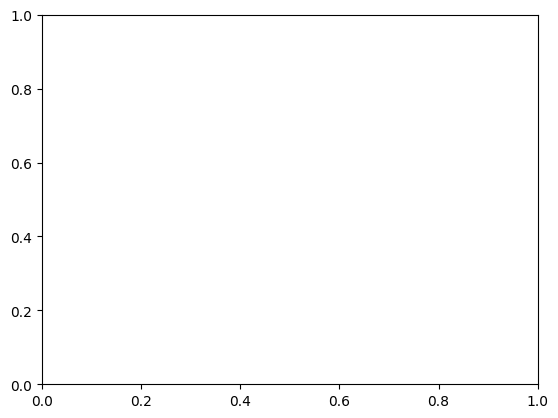

In [74]:
plt.plot(target_layer)
plt.imshow()